In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import matplotlib.colors as mcolors
from spectral_explain.qsft.BCH import BCH

In [2]:
# pickle load file into dict
with open('../sentiment_paper.pkl', 'rb') as f:
    # load pickle file into dictionary p
    method_results = pickle.load(f)

with open('../sentiment_lasso_2.pkl', 'rb') as f:
    # load pickle file into dictionary p
    l2 = pickle.load(f)

In [3]:
l2['methods']['linear_2']

{'time': array([[  1.54297686,   3.44101   ,  13.65245676, ...,  99.91340566,
         119.66149306, 164.06130314],
        [  1.48482442,   3.2600565 ,  13.52497983, ...,  85.13131785,
         102.28369808, 142.14844465],
        [  1.30049348,   2.93680286,  12.57253909, ...,  55.58499527,
          70.42380071, 100.03600407],
        ...,
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,   0.        , ...,   0.        ,
           0.        ,   0.        ]]),
 'test_r2': array([[-20.9110688 , -17.73532673, -11.8069906 , ...,   0.77852923,
           0.8551751 ,   0.87413601],
        [ -4.25456669,  -3.51921512,  -2.07933522, ...,   0.79013636,
           0.85977996,   0.87856229],
        [  0.11933291,   0.23506005,   0.39932628, ...,   0.84494883,
           0.8889915 ,   0.90114

In [4]:
method_results['methods']['linear_2']['time'][60:80,:] = l2['methods']['linear_2']['time'][:20,:]
method_results['methods']['linear_2']['test_r2'][60:80,:] = l2['methods']['linear_2']['test_r2'][:20,:]

In [5]:
method_dict = {'qsft_hard_0': 'SpectralExplain',
               'qsft_soft_0': 'SpecExpSoft',
               'lasso_1': 'LIME',
               'lasso_2': 'LASSO 2',
               'lasso_3': 'LASSO 3',
               'linear_1': 'Banzhaf',
               'linear_2': 'Faith-Banzhaf\n2nd Order',
               'linear_3': 'Faith-Banzhaf\n3rd Order',
               'linear_4': 'Faith-Banzhaf\n4th Order'
               }
method_order = ['linear_1', 'lasso_1', 'linear_2', 'lasso_2', 'linear_3', 'lasso_3',
                'qsft_hard_0', 'qsft_soft_0']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_gradient", ['#FFFFFF', '#290133'])

In [6]:
# all b = 8, test_r2
results_mean = np.zeros((len(method_order), 8))
results_std = np.zeros((len(method_order), 8))
time_mean = np.zeros((len(method_order), 8))
time_std = np.zeros((len(method_order), 8))
for i, method in enumerate(method_order):
    print(method)
    for bundle in range(8):
        l = method_results['methods'][method]['test_r2'][20 * bundle : 20 * (bundle + 1), 6]
        results_mean[i, bundle] = np.mean(l)
        results_std[i, bundle] = np.std(l)
        m = method_results['methods'][method]['time'][20 * bundle : 20 * (bundle + 1), 6]
        time_mean[i, bundle] = np.mean(m)
        time_std[i, bundle] = np.std(m)

linear_1
lasso_1
linear_2
lasso_2
linear_3
lasso_3
qsft_hard_0
qsft_soft_0


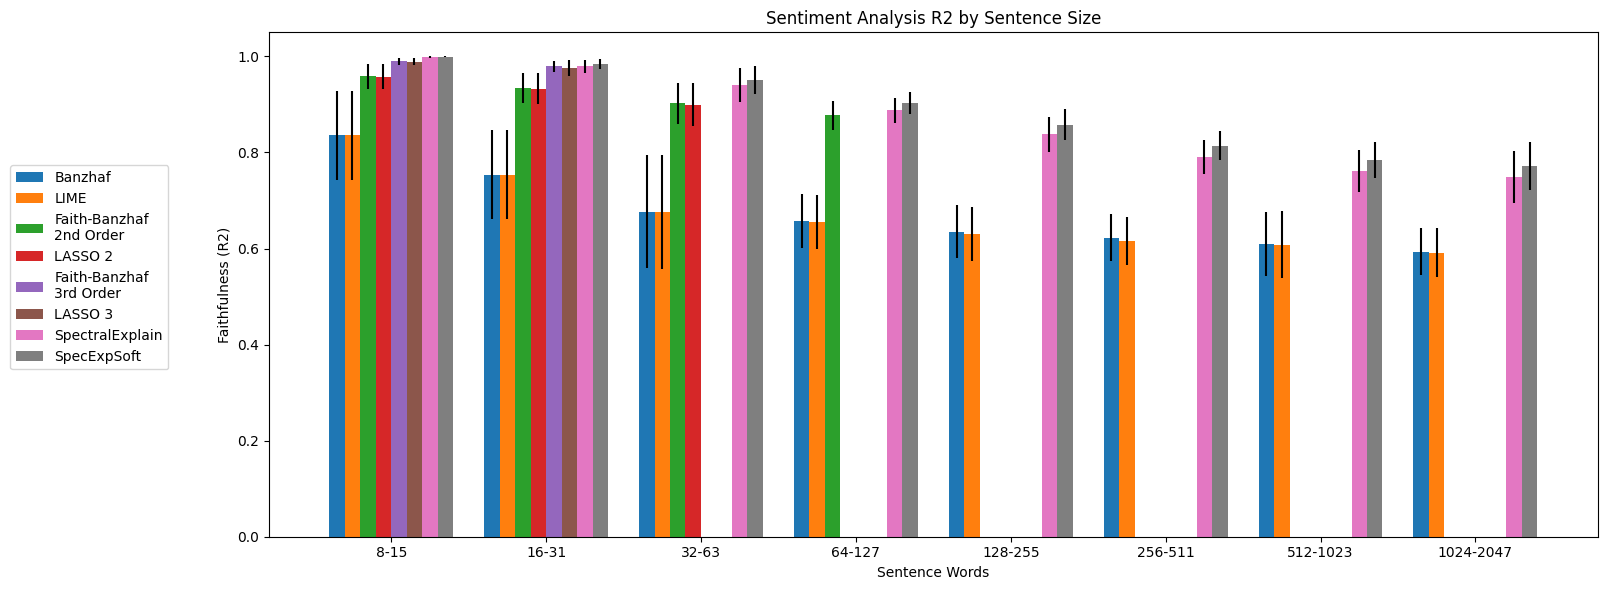

In [7]:
groups = ['8-15', '16-31', '32-63', '64-127', '128-255', '256-511', '512-1023', '1024-2047']
paper_methods = ['qsft_hard_0', 'lasso_1', 'linear_2', 'linear_3', 'linear_4']
# Set the width of the bars
bar_width = 0.35

# Calculate the positions for the bars
x = 3.5 * np.arange(len(groups))
x1 = x - bar_width / 2
x2 = x + bar_width / 2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 6))
# Plot the bars
for i, method in enumerate(method_order):
    ax.bar(x + (i - 3.5) * bar_width, results_mean[i], yerr=results_std[i], width=bar_width, label=method_dict[method])

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title('Sentiment Analysis R2 by Sentence Size')
ax.set_xlabel('Sentence Words')
ax.set_ylabel('Faithfulness (R2)')

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(-.20, 0.75), loc='upper left')
# Show the plot

plt.tight_layout()
plt.savefig('Sentiment R2.png', dpi=300, bbox_inches='tight')
plt.show()

ValueError: 'linear_4' is not in list

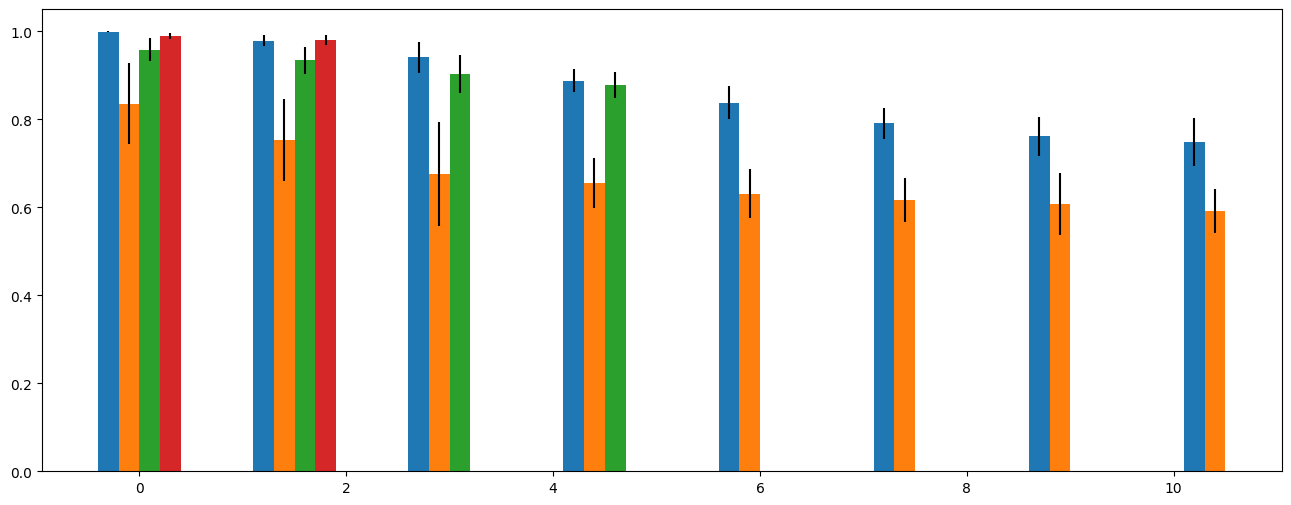

In [8]:
# Set the width of the bars
bar_width = 0.20

# Calculate the positions for the bars
x = 1.5 * np.arange(len(groups))
x1 = x - bar_width / 2
x2 = x + bar_width / 2

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 6))
# Plot the bars
for j, method in enumerate(paper_methods):
    i = method_order.index(method)
    ax.bar(x + (j - 1.5) * bar_width, results_mean[i], yerr=results_std[i], width=bar_width, label=method_dict[method])

# Set the x-axis labels
ax.set_xticks(x)
ax.set_xticklabels(groups)
ax.set_title('Sentiment Analysis $R^2$ by Sentence Size')
ax.set_xlabel('Sentence Words')
ax.set_ylabel('Faithfulness ($R^2$)')

# Add a legend
ax.legend()
plt.legend(bbox_to_anchor=(-.20, 0.75), loc='upper left')
# Show the plot

plt.tight_layout()
plt.savefig('Sentiment R2 Reduced.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
results_mean = np.vstack((results_mean, [1,0,0,0,0,0,0,0]))
time_mean = np.vstack((time_mean, [10.3,0,0,0,0,0,0,0]))

(9, 8)


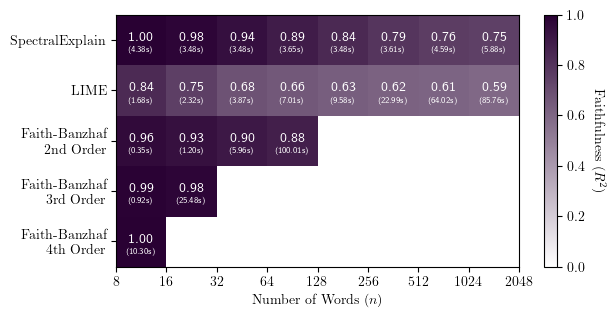

In [11]:
print(results_mean.shape)
l = [6,1,2,4,8]
plt.rcParams['text.usetex'] = True
plt.rcParams.update({
    "text.usetex": True,              # Use TeX for text rendering
    "font.family": "serif",           # Use serif fonts
})
fig, ax = plt.subplots()
im = ax.imshow(results_mean[l,:], cmap=cmap, vmin=0, vmax=1)

# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(groups)+1)- 0.5, labels=[2 ** i for i in range(3, 12)],
              ha="center", rotation_mode="anchor")
ax.set_yticks(range(len(paper_methods)), labels=[method_dict[m] for m in paper_methods])

# Loop over data dimensions and create text annotations.
for i in range(len(paper_methods)):
    for j in range(len(groups)):
        mean_val = results_mean[l, :][i, j]
        ax.text(j, i - 0.05, rf"\textsf{{{mean_val:.2f}}}", ha="center", va="center", color="white", fontsize=10)

        time_val = time_mean[l, :][i, j]
        ax.text(j, i + 0.2, rf"\textsf{{({time_val:.2f}s)}}", ha="center", va="center", color="white", fontsize=6)
cbar = fig.colorbar(im, ax=ax, shrink=0.56)
cbar.set_label(r"Faithfulness ($R^2$)", rotation=270, labelpad=15)

# ax.set_title(r"\textbf{Faithfulness of Sentiment Analysis at Scale}")
ax.set_xlabel(r'Number of Words ($n$)')
fig.tight_layout()
plt.savefig('Sentiment R^2 Heatmap.png', dpi=400, bbox_inches='tight')
plt.show()

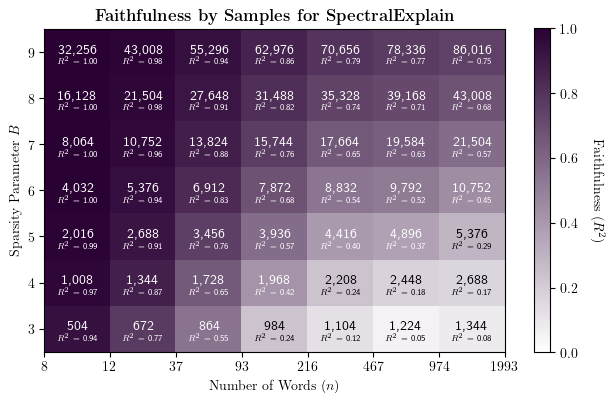

In [43]:
## Phase Diagram for SpectralExplain
sample_groupings = {}
for i, sample_seq in enumerate(method_results['samples']):
    ss = tuple(sample_seq)
    if tuple(ss) in sample_groupings:
        sample_groupings[ss].append(i)
    else:
        sample_groupings[ss] = [i]
    ss_len = len(ss)

sort_s = list(sample_groupings.keys())
sort_s.sort(key=lambda x: x[0])


sample_grouping_means = np.zeros((len(sample_groupings), ss_len))
for j, s in enumerate(sort_s):
    indices = sample_groupings[s]

    # Ensure this indexing works as expected with test_r2
    group_results = method_results['methods']['qsft_hard_0']['test_r2'][indices, :]
    sample_grouping_means[j,:] = group_results.mean(axis=0)[::-1]

# Set up the plot
fig, ax = plt.subplots()
im = ax.imshow(sample_grouping_means.T, cmap=cmap, vmin=0, vmax=1, aspect=0.7)

n_word_limits = [8, 12, 37, 93, 216, 467, 974, 1993]
ax.set_xticks(np.arange(len(list(sample_groupings.keys()))+1)- 0.5, labels=n_word_limits,
              ha="center", rotation_mode="anchor", family=['serif'])
ax.set_yticks(range(ss_len), labels=list(range(ss_len+2,2,-1)), family='serif')

# Loop over data dimensions and create text annotations.
for i in range(len(sample_groupings)):
    for j in range(ss_len):
        r2 = sample_grouping_means[i][j]
        mean_val = sample_grouping_means[i, j]
        ax.text(i, j - 0.05, rf"\textsf{{{int(sort_s[i][ss_len - j - 1]):,}}}", ha="center", va="center", color="white" if r2 >= 0.3 else "black", fontsize=10, fontfamily='sans-serif')

        ax.text(i, j + 0.2, rf"\textsf{{$R^2$ = {mean_val:.2f}}}", ha="center", va="center", fontsize=6,
                fontfamily='sans-serif', color="white" if r2 >= 0.3 else "black")

# cmap = plt.colormaps.get_cmap("Blues")

ax.set_xlabel(r'Number of Words ($n$)')
ax.set_ylabel(r'Sparsity Parameter $B$')
ax.set_title(r'\textbf{Faithfulness by Samples for SpectralExplain}')

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap)
cbar = plt.colorbar(sm, ax=ax, shrink=0.72)
# cbar = fig.colorbar(sc, ax=ax, orientation='vertical', cmap=cmap)
cbar.set_label(r'Faithfulness ($R^2$)', rotation=270, labelpad=20)

# Adjust layout for better spacing
fig.tight_layout()

# Save the plot
plt.savefig('Sentiment R^2 Samples.png', dpi=400, bbox_inches='tight')
plt.show()

In [44]:
[16, 26, 30, 36, 42, 50, 58, 63, 68, 75, 77]

[16, 26, 30, 36, 42, 50, 58, 63, 68, 75, 77]

In [ ]:
plt.clf()
plt.figure(figsize=(8, 4))

for i, method in enumerate(method_order):
    plt.plot(range(len(groups)), time_mean[i], label=method_dict[method])
    
plt.xticks(range(len(groups)), groups)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 0.75), loc='upper left')
plt.ylim(0,60)
plt.title('Average Time Taken by Sentence Size')
plt.xlabel('Sentence Words')
plt.ylabel('Time Taken (s)')

plt.tight_layout()
plt.savefig('Sentiment Time.png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

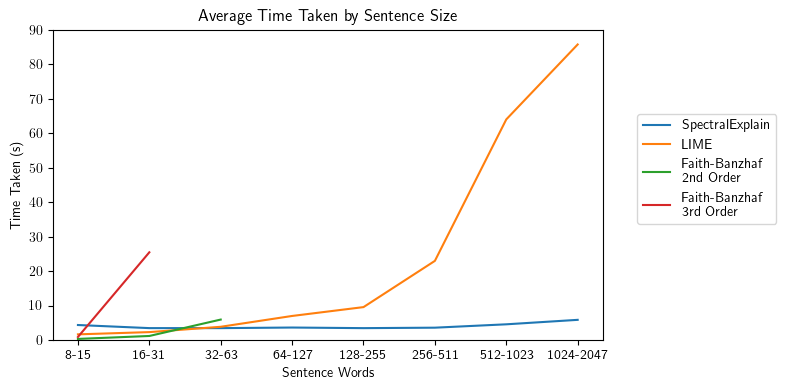

In [108]:
plt.clf()
plt.figure(figsize=(8, 4))
for j, method in enumerate(paper_methods):
    i = method_order.index(method)
    plt.plot(range(8), time_mean[i], label=method_dict[method])
    
plt.xticks(range(8), groups)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 0.75), loc='upper left')
plt.ylim(0,90)
plt.title('Average Time Taken by Sentence Size')
plt.xlabel('Sentence Words')
plt.ylabel('Time Taken (s)')

plt.tight_layout()
plt.savefig('Sentiment Time Reduced.png', dpi=300, bbox_inches='tight')
plt.show()